In [1]:
### just to remove ttempting to fetch value instead of handling error Internal: 
##failed to get device attribute 13 for device 0: CUDA_ERROR_UNKNOWN: unknown error


# run this at the start of the notebook


# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
# # your code

# tf.debugging.set_log_device_placement(True)
# # Create some tensors
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)
# print(c)


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import PIL #pillow import
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
first_image = X_train[0]

In [7]:
first_image.shape  # single image shape

(28, 28)

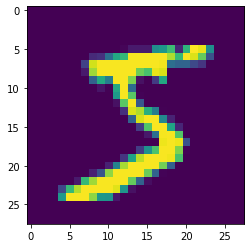

In [8]:
plt.imshow(first_image)

In [9]:
PIL.Image.fromarray(first_image, mode=None)

In [10]:
PIL.Image.fromarray(first_image, mode=None).width, PIL.Image.fromarray(first_image, mode=None).height

(28, 28)

In [11]:
y_train[0]

5

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train_new = to_categorical(y_train, num_classes=10)

In [15]:
y_train_new.shape

(60000, 10)

In [16]:
y_train_new[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_test_new = to_categorical(y_test, num_classes=10)

In [18]:
first_image.max(), first_image.min()  # max and min pixel in a image

(255, 0)

In [19]:
X_train = X_train/255
X_test = X_test/255

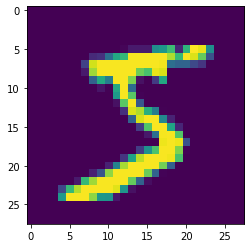

In [20]:
plt.imshow(X_train[0])

In [21]:
# reshape in (batch_size, width, height, color_channels)
X_train = X_train.reshape(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(10000, 28, 28, 1)

### creating model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(input_shape= (28,28,1) ,filters=32, kernel_size=(4,4), strides=(1,1), padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#output layer -> softmax->multiclass problem
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss')

In [27]:
model.fit(X_train, y_train_new, validation_data=(X_test, y_test_new), epochs=10, callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1647 - accuracy: 0.9502 - val_loss: 0.0840 - val_accuracy: 0.9730
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0616 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0563 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0524 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0543 - val_accuracy: 0.9844


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.164729,0.950217,0.083978,0.9730
1,0.058006,0.982167,0.061555,0.9816
2,0.038233,0.988000,0.056343,0.9836
3,0.026532,0.991400,0.052448,0.9851
4,0.020420,0.993100,0.054259,0.9844


<AxesSubplot:>

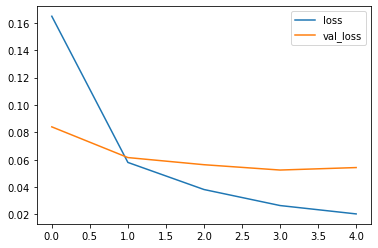

In [30]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

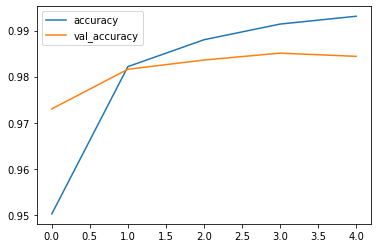

In [31]:
metrics[['accuracy', 'val_accuracy']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(X_test, y_test_new)

313/313 [==============================] - 2s 7ms/step - loss: 0.0543 - accuracy: 0.9844


[0.05425916612148285, 0.9843999743461609]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [40]:
print(confusion_matrix(y_test, y_pred))

[[ 973    1    2    0    0    0    2    1    1    0]
 [   0 1127    1    2    0    2    2    1    0    0]
 [   0    5 1005    2    2    0    3    8    7    0]
 [   0    0    3  996    0    2    0    3    3    3]
 [   1    0    1    0  974    0    1    0    0    5]
 [   2    0    1    4    0  879    5    0    1    0]
 [   8    1    0    1    4    6  935    0    3    0]
 [   0    2    7    1    1    0    0 1012    2    3]
 [   4    0    2    1    0    2    1    2  959    3]
 [   2    3    0    0    8    8    0    3    1  984]]


<AxesSubplot:>

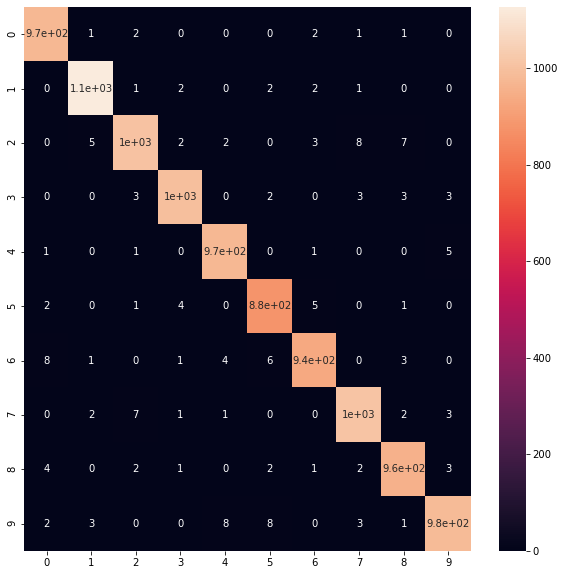

In [45]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [49]:
mynumber = X_test[0]

In [50]:
mynumber.shape

(28, 28, 1)

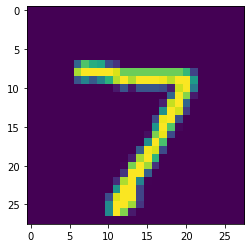

In [51]:
plt.imshow(mynumber)

In [54]:
model.predict_classes(mynumber.reshape(1,28,28,1))

array([7], dtype=int64)